### Data Cleaning and Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CustomerReviews.csv")

In [3]:
# pd.set_option("display.max_rows",2000)

In [4]:
df.head(10)

,Name,Review,Rating,Verify,Aircraft,Seat Type,Type Of Traveller,Recommended,Ground Service,Wifi & Connectivity,Seat Comfort,Value For Money,Inflight Entertainment,Food & Beverages,Cabin Staff Service,Route
0,G Thompson,✅ Trip Verified | We flew on probably the firs...,8,NaN,Boeing 787 / A320,Economy Class,Solo Leisure,yes,3.0,NaN,2,5,4,4,3,Johannesburg to Istanbul (SAW) via Doha
1,Nico Brandts,"✅ Trip Verified | Service was ok, pretty good...",8,NaN,Boeing 787 / 777-300ER,Economy Class,Solo Leisure,yes,4.0,3.0,3,4,3,3,4,AMS to BKK via DOH
2,Dave Houlihan,✅ Trip Verified | 12th February 2024 From chec...,5,NaN,Boeing 787,Business Class,Business,yes,1.0,1.0,5,3,4,2,5,Dubai DWC to Johanesburg via Doha
3,Thomas Kingston,Not Verified | Remarkable experience. Great t...,9,NaN,Boeing 777-300ER,Economy Class,Solo Leisure,yes,3.0,NaN,4,4,4,4,4,London to Doha
4,Thomas Kingston,✅ Trip Verified | My last travel in January 2...,7,NaN,A330-200,Economy Class,Solo Leisure,yes,3.0,NaN,2,4,1,4,3,Doha to Jakarta
5,Stephen Greenhalgh,"✅ Trip Verified | What a trip, highest level ...",10,NaN,A320,Economy Class,Family Leisure,yes,5.0,NaN,4,5,4,2,4,Entebbe to Sofia via Doha
6,Leonard Kipping,✅ Trip Verified | No complaints about the ser...,10,NaN,A380,Business Class,Solo Leisure,yes,5.0,3.0,5,5,4,4,5,Doha to Bangkok
7,Kok Wai Lam,✅ Trip Verified | When I arrived at my depart...,7,NaN,B777,Economy Class,Solo Leisure,yes,4.0,4.0,4,5,5,3,4,Dallas to Singapore via DOH
8,Tom Osborne,✅ Trip Verified | Have been using Qatar Airwa...,10,NaN,Boeing 787 / A380,Economy Class,Solo Leisure,yes,4.0,NaN,4,5,5,5,5,LHR-DOH-BKK
9,Jeff Fandl,✅ Trip Verified | I flew Qatar Airways during...,2,NaN,Boeing 787 / Boeing 777,Economy Class,Business,no,5.0,NaN,1,1,5,2,5,SIN to MIA via DOH


In [5]:
df2 = df["Review"].str.split("|",expand=True)
df2.columns = ["first","second"]
df2.head()

,first,second
0,✅ Trip Verified,We flew on probably the first A380 the airlin...
1,✅ Trip Verified,"Service was ok, pretty good on my aisle and ..."
2,✅ Trip Verified,12th February 2024 From check in to get onboa...
3,Not Verified,"Remarkable experience. Great tasting food, l..."
4,✅ Trip Verified,My last travel in January 2024 the food qual...


In [6]:
df["Verify"] = df2["first"]
df["Review"] = df2["second"]

In [7]:
df["Verify"] = df["Verify"].str.replace("✅","")

In [8]:
df

,Name,Review,Rating,Verify,Aircraft,Seat Type,Type Of Traveller,Recommended,Ground Service,Wifi & Connectivity,Seat Comfort,Value For Money,Inflight Entertainment,Food & Beverages,Cabin Staff Service,Route
0,G Thompson,We flew on probably the first A380 the airlin...,8,Trip Verified,Boeing 787 / A320,Economy Class,Solo Leisure,yes,3.0,NaN,2,5,4,4,3,Johannesburg to Istanbul (SAW) via Doha
1,Nico Brandts,"Service was ok, pretty good on my aisle and ...",8,Trip Verified,Boeing 787 / 777-300ER,Economy Class,Solo Leisure,yes,4.0,3.0,3,4,3,3,4,AMS to BKK via DOH
2,Dave Houlihan,12th February 2024 From check in to get onboa...,5,Trip Verified,Boeing 787,Business Class,Business,yes,1.0,1.0,5,3,4,2,5,Dubai DWC to Johanesburg via Doha
3,Thomas Kingston,"Remarkable experience. Great tasting food, l...",9,Not Verified,Boeing 777-300ER,Economy Class,Solo Leisure,yes,3.0,NaN,4,4,4,4,4,London to Doha
4,Thomas Kingston,My last travel in January 2024 the food qual...,7,Trip Verified,A330-200,Economy Class,Solo Leisure,yes,3.0,NaN,2,4,1,4,3,Doha to Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Tom Parker,None,5,Flew from LHR to DOH 23rd February for an onwa...,NaN,Economy Class,NaN,yes,NaN,NaN,4,4,3,5,5,NaN
1996,C Aiken,None,7,Manchester-Doha-Melbourne 20th Feb 2015. First...,NaN,Economy Class,NaN,yes,NaN,NaN,4,4,4,4,4,NaN
1997,G Mossom,None,8,LHR-DOH return QR016/015 on the all Business c...,NaN,Business Class,NaN,yes,NaN,NaN,4,5,3,5,4,NaN
1998,Valentine Mendanha,None,3,Flew QR on 3 Feb to Cape Town. The Dreamliner ...,NaN,Economy Class,NaN,no,NaN,NaN,1,2,2,2,2,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    2000 non-null   object 
 1   Review                  1621 non-null   object 
 2   Rating                  2000 non-null   int64  
 3   Verify                  2000 non-null   object 
 4   Aircraft                520 non-null    object 
 5   Seat Type               2000 non-null   object 
 6   Type Of Traveller       620 non-null    object 
 7   Recommended             2000 non-null   object 
 8   Ground Service          460 non-null    float64
 9   Wifi & Connectivity     100 non-null    float64
 10  Seat Comfort            2000 non-null   int64  
 11  Value For Money         2000 non-null   int64  
 12  Inflight Entertainment  2000 non-null   int64  
 13  Food & Beverages        2000 non-null   int64  
 14  Cabin Staff Service     2000 non-null   

In [10]:
df.isnull().sum()

Name                         0
Review                     379
Rating                       0
Verify                       0
Aircraft                  1480
Seat Type                    0
Type Of Traveller         1380
Recommended                  0
Ground Service            1540
Wifi & Connectivity       1900
Seat Comfort                 0
Value For Money              0
Inflight Entertainment       0
Food & Beverages             0
Cabin Staff Service          0
Route                     1400
dtype: int64

There are columns with so many null values. lets drop those colunms for better analysis.

In [11]:
df = df.drop(["Aircraft","Ground Service","Wifi & Connectivity","Route","Type Of Traveller"],axis=1)

In [12]:
df["Review"].fillna(value="Review Not provided",inplace = True)

In [13]:
df.describe()

,Rating,Seat Comfort,Value For Money,Inflight Entertainment,Food & Beverages,Cabin Staff Service
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.130000,3.590000,4.160000,3.700000,3.680000,3.980000
std,2.481165,1.242043,0.997445,1.204461,1.165452,1.149026
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000
50%,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000


from the above description, it is clear that most of the passengers are quite satisfied with services.

In [14]:
soc = df.groupby("Recommended")["Review"].count().reset_index()
soc

,Recommended,Review
0,no,500
1,yes,1500


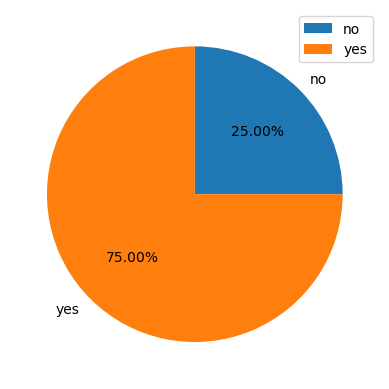

In [15]:
plt.pie(soc["Review"],labels=soc["Recommended"],autopct='%.2f%%')
plt.legend()
plt.show()

From the above chart,we can say that 74% of passengers are satisfied with Qatar Airways.Let's breakdown the data of the 
dissatisfied and satisfied passengers.

In [16]:
dis_passengers = df[df["Recommended"]=='no']
sat_passengers = df[df["Recommended"]=='yes']
dis_passengers.describe()

,Rating,Seat Comfort,Value For Money,Inflight Entertainment,Food & Beverages,Cabin Staff Service
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.68000,2.200000,3.200000,2.680000,2.720000,2.720000
std,1.59458,1.132504,1.201202,1.191823,1.282533,1.115387
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.00000,1.000000,3.000000,2.000000,2.000000,2.000000
50%,4.00000,2.000000,3.000000,3.000000,2.000000,2.000000
75%,5.00000,3.000000,4.000000,3.000000,3.000000,3.000000
max,7.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
sat_passengers.describe()

,Rating,Seat Comfort,Value For Money,Inflight Entertainment,Food & Beverages,Cabin Staff Service
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8.280000,4.053333,4.480000,4.040000,4.000000,4.400000
std,1.438627,0.878068,0.660725,0.999533,0.924069,0.800267
min,4.000000,2.000000,3.000000,1.000000,1.000000,2.000000
25%,7.000000,4.000000,4.000000,3.000000,3.000000,4.000000
50%,9.000000,4.000000,5.000000,4.000000,4.000000,5.000000
75%,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000


After analysing the Data from passenger reviews, what I understood is:

1. Most of paassengers are positive about travelling in Qatar Airways.
2. From the data provided, every sevice is provided well in Qatar Airway.

In [18]:
grouped = df.groupby("Seat Type")

In [19]:
pd.set_option("display.max_columns",2000)

In [20]:
grouped.describe()

Rating                                                  \
                 count      mean       std  min   25%  50%   75%   max   
Seat Type                                                                
Business Class   720.0  7.722222  2.525102  1.0  6.75  9.0  9.25  10.0   
Economy Class   1280.0  6.796875  2.393500  1.0  5.00  7.0  9.00  10.0   

               Seat Comfort                                                \
                      count      mean       std  min   25%  50%  75%  max   
Seat Type                                                                   
Business Class        720.0  4.222222  1.109100  1.0  4.00  5.0  5.0  5.0   
Economy Class        1280.0  3.234375  1.169621  1.0  2.75  3.0  4.0  5.0   

               Value For Money                                                \
                         count      mean       std  min   25%  50%  75%  max   
Seat Type                                                                      
Business Class           720.0  4.388889  0.921925  1.0  4.00  5.0  5.0  5.0   
Economy Class           1280.0  4.031250  1.015421  1.0  3.75  4.0  5.0  5.0   

               Inflight Entertainment                                          \
                                count      mean       std  min  25%  50%  75%   
Seat Type                                                                       
Business Class                  720.0  3.611111  1.113273  1.0  3.0  4.0  4.0   
Economy Class                  1280.0  3.750000  1.250489  1.0  3.0  4.0  5.0   

                    Food & Beverages                                      \
                max            count      mean       std  min   25%  50%   
Seat Type                                                                  
Business Class  5.0            720.0  4.111111  0.843127  2.0  4.00  4.0   
Economy Class   5.0           1280.0  3.437500  1.248924  1.0  2.75  4.0   

                          Cabin Staff Service                                 \
                 75%  max               count      mean       std  min   25%   
Seat Type                                                                      
Business Class  5.00  5.0               720.0  4.138889  1.084799  2.0  3.75   
Economy Class   4.25  5.0              1280.0  3.890625  1.174623  1.0  3.00   

                               
                50%  75%  max  
Seat Type                      
Business Class  5.0  5.0  5.0  
Economy Class   4.0  5.0  5.0

In [21]:
df2 = df2.drop(["first"],axis=1)

In [22]:
df2["Review"] = df2["second"]

In [23]:
df2 = df2.drop(["second"],axis=1)

In [24]:
df2.to_csv("Reviews.csv",index=False)
print("Saved")

Saved
